In [5]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle

In [6]:
data = pd.read_csv('codon_usage.csv',low_memory=False)

In [7]:
# to get all columns in data
data

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13023,pri,0,9601,1097,Pongo pygmaeus abelii,0.02552,0.03555,0.00547,0.01367,0.01276,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
13024,pri,1,9601,2067,mitochondrion Pongo pygmaeus abelii,0.01258,0.03193,0.01984,0.00629,0.01451,...,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
13025,pri,1,9602,1686,mitochondrion Pongo pygmaeus pygmaeus,0.01423,0.03321,0.01661,0.00356,0.01127,...,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
13026,pri,0,9606,40662582,Homo sapiens,0.01757,0.02028,0.00767,0.01293,0.01319,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156


# Data Pre Processing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13028 entries, 0 to 13027
Data columns (total 69 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kingdom      13028 non-null  object 
 1   DNAtype      13028 non-null  int64  
 2   SpeciesID    13028 non-null  int64  
 3   Ncodons      13028 non-null  int64  
 4   SpeciesName  13028 non-null  object 
 5   UUU          13028 non-null  object 
 6   UUC          13028 non-null  object 
 7   UUA          13028 non-null  float64
 8   UUG          13028 non-null  float64
 9   CUU          13028 non-null  float64
 10  CUC          13028 non-null  float64
 11  CUA          13028 non-null  float64
 12  CUG          13028 non-null  float64
 13  AUU          13028 non-null  float64
 14  AUC          13028 non-null  float64
 15  AUA          13028 non-null  float64
 16  AUG          13028 non-null  float64
 17  GUU          13028 non-null  float64
 18  GUC          13028 non-null  float64
 19  GUA 

<AxesSubplot:>

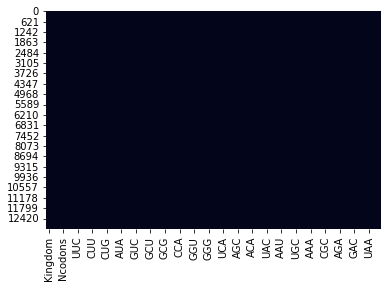

In [5]:
#checking for null values
sns.heatmap(data.isnull(), cbar=False)

In [6]:
data.describe()

,DNAtype,SpeciesID,Ncodons,UUA,UUG,CUU,CUC,CUA,CUG,AUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
count,13028.000000,13028.000000,1.302800e+04,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,...,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000
mean,0.367209,130451.105926,7.960576e+04,0.020637,0.014104,0.017820,0.018288,0.019044,0.018450,0.028352,...,0.005454,0.009929,0.006422,0.024178,0.021164,0.028290,0.021683,0.001645,0.000592,0.006178
std,0.688726,124787.086107,7.197010e+05,0.020709,0.009280,0.010586,0.014572,0.024250,0.016578,0.017507,...,0.006605,0.008574,0.006387,0.013828,0.013041,0.014342,0.015018,0.001834,0.000907,0.010344
min,0.000000,7.000000,1.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28850.750000,1.602000e+03,0.005610,0.007108,0.010890,0.007830,0.005307,0.007180,0.016360,...,0.001220,0.001690,0.001170,0.012380,0.011860,0.017360,0.009710,0.000560,0.000000,0.000410
50%,0.000000,81971.500000,2.927500e+03,0.015260,0.013360,0.016130,0.014560,0.009685,0.012800,0.025475,...,0.003530,0.009270,0.004545,0.025420,0.019070,0.026085,0.020540,0.001380,0.000420,0.001130
75%,1.000000,222891.250000,9.120000e+03,0.029485,0.019810,0.022730,0.025112,0.017245,0.024315,0.038113,...,0.007150,0.015922,0.010250,0.034190,0.027690,0.036800,0.031122,0.002370,0.000830,0.002890
max,12.000000,465364.000000,4.066258e+07,0.151330,0.101190,0.089780,0.100350,0.163920,0.107370,0.154060,...,0.055540,0.098830,0.058430,0.185660,0.113840,0.144890,0.158550,0.045200,0.025610,0.106700


In [7]:
pd.set_option('display.max_rows', 50000)

In [8]:
data.nunique()

Kingdom           11
DNAtype           11
SpeciesID      12368
Ncodons         7103
SpeciesName    13016
UUU             4791
UUC             4121
UUA             4796
UUG             3282
CUU             3677
CUC             4389
CUA             4063
CUG             4562
AUU             5243
AUC             4684
AUA             4477
AUG             3237
GUU             3640
GUC             3602
GUA             3149
GUG             3993
GCU             3725
GCC             5044
GCA             3451
GCG             3559
CCU             2751
CCC             3221
CCA             3488
CCG             2889
UGG             2597
GGU             3622
GGC             4392
GGA             3538
GGG             2613
UCU             3273
UCC             2997
UCA             3391
UCG             2306
AGU             2440
AGC             2565
ACU             3253
ACC             4188
ACA             4170
ACG             2484
UAU             3977
UAC             3003
CAA             3670
CAG          

'arc'(archaea), 'bct'(bacteria), 'phg'(bacteriophage), 'plm' (plasmid), 'pln' (plant), 'inv' (invertebrate), 'vrt' (vertebrate), 'mam' (mammal), 'rod' (rodent), 'pri' (primate), and 'vrl'(virus) sequence entries. Note that the CUTG database does not contain 'arc' and 'plm' (these have been manually curated ourselves).

In [16]:
data['Kingdom'].replace({'bct':'Bacteria' , 'inv' : "Invertebrates" , 'mam' : 'mammals' , 'pln' : "plant", "pri" : 'primates', 'rod':'rodents' , 'vrt': 'vertebrates', 'vrl' : 'virus', 'phg':'bacyeriophage','arc':'archae','plm':'plasmid'},inplace=True)

In [17]:
# lets check some value_counts for kingdom 
data['Kingdom'].value_counts()

Bacteria         2920
virus            2832
plant            2523
vertebrates      2077
Invertebrates    1345
mammals           572
bacyeriophage     220
rodents           215
primates          180
archae            126
plasmid            18
Name: Kingdom, dtype: int64

# **STEP - 02 😀 Data Transformation**

In [18]:
# Columns is a float value with type object we have to change the data type
data['UUU']=data['UUU'].replace(['non-B hepatitis virus','12;I'],'NaN')
data['UUC']=data['UUC'].replace('-','NaN')
data['UUU'] = data['UUU'].astype('float32')
data['UUC'] = data['UUC'].astype('float32')
data.dropna(inplace=True)

In [19]:
data

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,virus,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,virus,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,virus,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.02180,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,virus,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,virus,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13023,primates,0,9601,1097,Pongo pygmaeus abelii,0.02552,0.03555,0.00547,0.01367,0.01276,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
13024,primates,1,9601,2067,mitochondrion Pongo pygmaeus abelii,0.01258,0.03193,0.01984,0.00629,0.01451,...,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
13025,primates,1,9602,1686,mitochondrion Pongo pygmaeus pygmaeus,0.01423,0.03321,0.01661,0.00356,0.01127,...,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
13026,primates,0,9606,40662582,Homo sapiens,0.01757,0.02028,0.00767,0.01293,0.01319,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156


In [20]:
# spilt dataset into X & Y 
X = data.drop(columns = ['Kingdom','SpeciesName','SpeciesID'], axis = 1 )
y = data['Kingdom']


In [21]:
# lets chk the shape of X
print("The shape of is X ", X.shape)
print("The shape of is y ", y.shape)

The shape of is X  (13026, 66)
The shape of is y  (13026,)


In [22]:
# Checking the value counts of target variable
y.value_counts()


Bacteria         2919
virus            2831
plant            2523
vertebrates      2077
Invertebrates    1345
mammals           572
bacyeriophage     220
rodents           215
primates          180
archae            126
plasmid            18
Name: Kingdom, dtype: int64

# **STEP - 03 ✨ Model Preparation**

In [31]:
# splitting the data into testing and training data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [32]:
X_test.shape

(3908, 66)

In [33]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

print(accuracy_score(y_train, dtc.predict(X_train))*100)
print(accuracy_score(y_test, y_pred)*100)



100.0
77.9682702149437


In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print(accuracy_score(y_train, rfc.predict(X_train))*100)
print(accuracy_score(y_test, y_pred)*100)


In [ ]:
pickle.dump(rfc, open("model.pkl", 'wb'))

In [ ]:
model=pickle.load(open("model.pkl", 'rb'))

In [ ]:
result=pd.DataFrame(model.predict(X_test))

In [29]:
result.to_csv("result.csv")